In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Lab 11: A Random Return to Decay - This Time on Jupyter!
March 26th, 2024

| Part | 1 | 2 | Total |
| --- | --- | --- |---|
| Points | 6  | 16  | 22  |
| Score |   |   |   |


## Objectives
1. Learn the reason and basics of creating and working with a Jupyter notebook in VSCode
2. Understand and implement stochastic radioactive decay

## Definition
There exist coding languages called **markdown languages**. These are used to format text in complex ways that cannot be easily accomplished via traditional basic text editors. There are many markdown languages, including HTML, LaTeX, and Markdown. Markdown is often used for its relative simplicity.

## Part 1: Life on (in) Jupyter

You may have noticed that the form of this assignment is a little different - it is written using what is called a Jupyter notebook. A Jupyter notebook is a clever file format that was developed by the iPython project to integrate Python code with rich documentation via the Markdown markdown language $[1]$. Jupyter notebooks are often utilized in teaching Python, as well as when performing data analysis in experimental physics, or when sharing Python code that requires heavy documentation.

Other coding languages you may utilize in physics, like C, Rust, or FORTRAN, cannot use Jupyter notebooks $[2]$. However, since it is not uncommon to see Jupyter notebooks when studying computational physics, we decided it was best to teach the basics of how to use them regardless. In practice, almost all of computational physics as well as much of experimental physics analysis is not done using a Jupyter notebook. However, it is not uncommon in theoretical physics work that uses python code, and is sometimes seen in experimental physics when producing figures.

In terms of practical use, working in Jupyter notebooks is very similar to writing python code as we have done up to now. A Jupyter notebook is organized into snippets of text, code, and outputs, collectively called cells. The paragraph you're currently reading is in a cell along with the next paragraph, while the above two paragraphs are in a separate cell.  An existing cell can be edited by double-clicking on it, by clicking on the "Edit Cell" in the upper left corner of the cell seen when hover over a cell, or by clicking the `Enter` key when a
cell is selected.

To create a new cell, you can either hover over the area right below an existing cell and clicking "+ Code" or "+ Markdown" or you can right-click in the area between cells and select "Insert Cell". When you create a new cell, you choose whether it is a markdown or code cell, however it is possible to change this after the cell is created. When you want to execute a cell, whether that is  to run code, or to compile the Markdown into text, you can click the `Shift + Enter` key combination. For markdown cells, you can alternatively click the "Stop Editing Cell" button which appears in the upper left of the cell when the cell is being edited. For code cells, you can click the "Execute Cell" button which appears left of the cell when it is selected or highlighted with the mouse.

1. (4 points) Enter into the editing mode for this cell in order to see how to
make a word **bolded** using Markdown. 
    * Create a new markdown cell below this and add some bolded text to it.
    * Create a new code cell below your markdown cell and `print()` the same text you bolded.
    * You may be prompted to select a kernel in order to run the code. If
       you are, just select the system global default.

**This is bold**

In [8]:
print("**This is bold**")
print("Except it isn't")
print("\033[1mBut this is\033[0m")

**This is bold**
Except it isn't
But this is


As mentioned above, Jupyter allows you to create nicely formatted text, so it is logical to ask: what sort of things can we do with this? Markdown has the benefit that basic LaTeX strings can be embedded into it and consequently compiled into the text (to see how this is implemented, edit try editing this cell). Let's consider if we wanted to discuss the function 
$$
\Gamma(x) = \int_0^\infty \frac{e^\lambda}{2\pi} d\lambda
$$
Writing such a formula in the comments of python code would not be as elegant as it is here, and so LaTeX can give us a huge benefit.

As you saw from doing question 1 above, the output of the python code immediately follows the code cell. This highlights one of the other benefits of using Jupyter notebooks: inline outputs. Let's say I wanted to show you a graph of a function, while also providing you the formula of the function in a nicely formatted way. I could do this easily with a Jupyter notebook.

Consider the function
$$
y(x) = e^{\sin(x)} \quad\text{s.t. } x \in [0, 2\pi].
$$
The output of such a function can be created and shown with the following code:

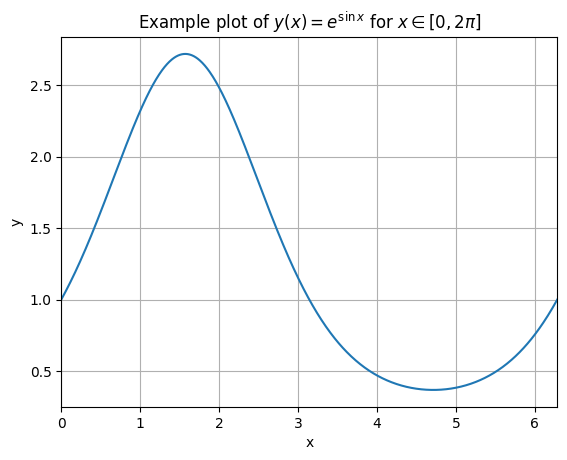

In [13]:
x = np.linspace(0, 2*np.pi, num=1000)
y = np.exp(np.sin(x))

plt.plot(x,y)

plt.xlim(0,2*np.pi)
plt.title(r"Example plot of $y(x)=e^{\sin{x}}$ for $x\in[0,2\pi]$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

plt.show()

There are a few things to note here. 

First, note that `np` is not defined within this code block. Instead, it is defined at the start of the notebook. This means that if you have not yet executed the first cell of the notebook, and attempt to execute the above cell, it will not work. There is a button at the top of the document "Run All" which will run all code starting at the first cell in the  notebook, and proceeding to the final cell, or until an error occurs. As such, it is best practice that any code which relies on code from a separate cell should come after the code it relies upon. 

Second, we still use `plt.show()` to display the figure output. You may see Jupyter notebooks elsewhere which do not use `plt.show()` yet still get a figure output. This is because a cell will output the output related to the last executed line of code. In the case of any call to `plt`, the output is typically (though not always) a reference to a component of a figure, which then also returns the figure itself. This is bad practice, and it is recommended to use `plt.show()` every time.

2. (2 points) Plot the function $y(x)=e^{\cos(x)}$ in a new code cell below. Create a text cell proceeding it where you give the equation using LaTeX in Markdown. As LaTeX is not a requirement of this course, just copy the format from this cell.

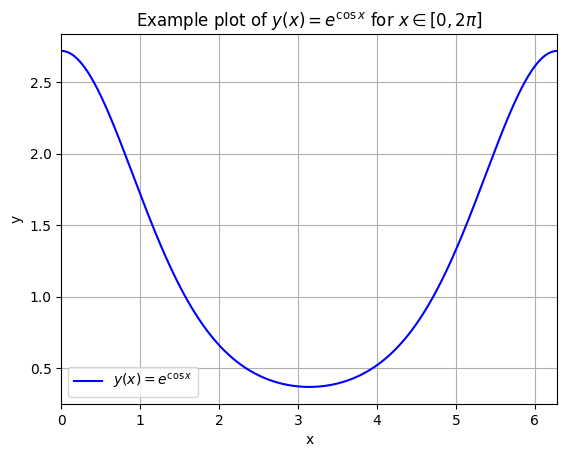

In [18]:
plt.figure(2)

x = np.linspace(0, 2*np.pi, num=1000)
y = np.e ** np.cos(x)

plt.plot(x,y, label=r"$y(x)=e^{\cos{x}}$", color='b')

plt.xlim(0,2*np.pi)
plt.title(r"Example plot of $y(x)=e^{\cos{x}}$ for $x\in[0,2\pi]$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

$$
y(x) = e^{\cos(x)}
$$

## Part 2: Simulating a Decay Process, Randomly

The following problems will walk you through creating a stochastic decay simulation for an arbitrary number of initially excited particles, $N(0)$, and an arbitrary decay constant, $\lambda$.

3. (4 points) Write a function `n_Bernoulli_trials()`, that takes as input the probability of success and the number of trials. It will return the number of successes and number of failures. **Hint**: Use `np.random.rand()` to generate a 1D array of random numbers. Count the number of random numbers $< p$ (that is, the number of successes) in a vectorized manner. for example, you could use use `np.where()`. 

In [22]:
def n_Bernoulli_trials(n, p):                   # Function to simulate n Bernoulli trials with probability p, using suggested method
    random_numbers = np.random.rand(n)
    return np.sum(random_numbers < p)

def n_Bernoulli_trials_binomial(n, p):          # Function to simulate n Bernoulli trials with probability p, using binomial distribution
    return np.random.binomial(n, p)

4.  (6 points) Write a function `stochastic_decay()` which takes the following
inputs: the initial number of particles $N_0$, the decay constant of the
particles $\lambda$, the time step of the simulation $\Delta t$, and the maximum
number of time steps to simulate $T$.  Once the algorithm has executed for the
number of steps specified, two arrays should be returned: one is an array
containing the times, the other is an array containing the number of excited
particles remaining at each time step.
    1. Calculate $p=\lambda\Delta t$ given the inputs, which it will print out.
        * This will help you ensure that the condition $p<<1$ is being satisfied
        for your choice of $\Delta t$
    2. Repeatedly call `n_Bernoulli_trials()`, after which the returned number
    of particles decayed will be subtracted from the number of currently
    un-decayed particles, resulting in the number of particles after $i$ steps
    of the simulations being $N_i = N_{i-1} -$`n_Bernoulli_trials()[0]`. 
    3. Append $N_i$ to the end of a list which keeps track of the number of
    un-decayed particles after each step (the zeroth entry should be equivalent
    to the input $N_0$).
    4. Once $i=T$, return the lists containing the time points, and the list
    containing each $N_i$, both as a ndarrays. The size of this array $T$ times
    $\Delta t$ is equivalent to the amount of time elapsed in the simulation.


In [25]:
# Function to simulate radioactive decay of N0 atoms with decay constant decay_constant, using n_Bernoulli_trials, with time step dt and total time T
def stochastic_decay(N0, decay_constant, dt, T):
    t = np.arange(0, T, dt)
    N = np.zeros(len(t))
    N[0] = N0
    for i in range(1, len(t)):
        N[i] = N[i-1] - n_Bernoulli_trials_binomial(N[i-1], decay_constant * dt)
    print(f'p = {decay_constant * dt}')
    return t, N

5.  (6 points) Given a $\lambda = 0.1$ particles/second, theoretically determine
the half life. Consider a sample with initially $N(0) = 1000$ excited particles.
Choose $\Delta t$ such that $p=0.0001$, and a number of steps such that we
expect $(1/2)^5$ of the initial excited particles to remain (i.e. run it for 5
half lives). 

    Call the function you wrote in question 4. Plot the number of particles as a
    function of time from your stochastic simulation, along with that from the
    decay, using `plt.plot()`. Then, produce a second figure using
    `plt.semilogy()`, where the y axis will be in logarithmic scale and the x
    axis will remain in linear scale. Describe what you see.
    

p = 0.0001


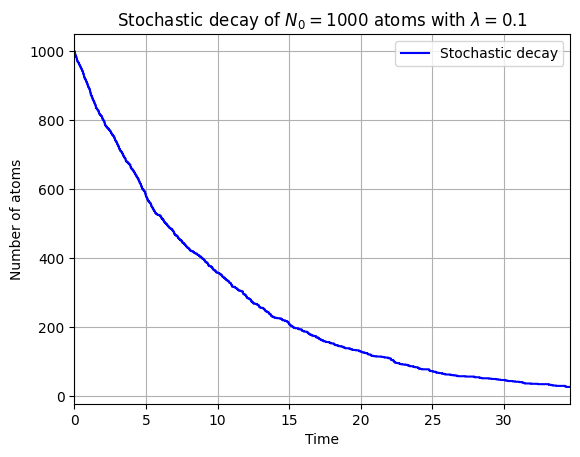

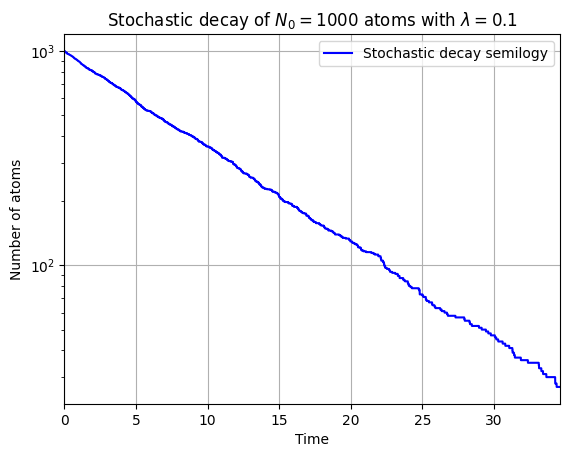

In [27]:
# $T_{1/2} = 0.693 / \lambda$
# $T_{1/2} = 0.693 / 0.1 = 6.93$

t, N = stochastic_decay(1000, 0.1, 0.001, 34.65)                                # Simulate decay of 1000 atoms with decay constant 0.1, time step 0.001 and total time 34.65

plt.figure(3)                                                                   # Initialize new figure

plt.plot(t, N, label='Stochastic decay', color='b')                             # Plot the decay

plt.xlim(0, 34.65)                                                              # Set x-axis limits
plt.title(r'Stochastic decay of $N_0 = 1000$ atoms with $\lambda = 0.1$')       # Set title
plt.xlabel('Time')                                                              # Set x-axis label
plt.ylabel('Number of atoms')                                                   # Set y-axis label
plt.grid()                                                                      # Show grid
plt.legend()                                                                    # Show legend
plt.show()                                                                      # Show plot

plt.figure(4)                                                                   

plt.semilogy(t, N, label='Stochastic decay semilogy', color='b')                # Plot the decay with a logarithmic y-axis

plt.xlim(0, 34.65)                                                              # Set x-axis limits
plt.title(r'Stochastic decay of $N_0 = 1000$ atoms with $\lambda = 0.1$')       # Set title
plt.xlabel('Time')                                                              # Set x-axis label
plt.ylabel('Number of atoms')                                                   # Set y-axis label
plt.grid()                                                                      # Show grid
plt.legend()                                                                    # Show legend
plt.show()                                                                      # Show plot

## Footnotes
$[1]$ The Markdown language has the unfortunate porperty of being both the name
of a language, and also the name of a class of languages. Do not let this
confuse you though, as not all markdown languages are even remotely similar to
Markdown, it was just the first. In fact, HTML stands for "Hyperlinkable Text
Markdown Language," even though if you've ever inspected the element of a
website you will know it looks very different from the Markdown you see here.

$[2]$ While Jupyter notebooks can only be used with Markdown for text and python
for code, VSCode actually extended the implementation of the notebook internally
to work with any markdown and traditional languages. The only exception is that
an interactive interpreter must be written to work with the VSCode
implementation, which is neither a given, nor something easy to do for many
compiled languages. Generally you will never use notebooks in this way, but it
is worth it to note that it is techincally feasible.